# TASK 1 - DATA CHECKING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset 
flight_data = pd.read_csv('Flyzy Flight Cancellation.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(flight_data.head())


First few rows of the dataset:
   Flight ID    Airline  Flight_Distance Origin_Airport Destination_Airport  \
0    7319483  Airline D              475      Airport 3           Airport 2   
1    4791965  Airline E              538      Airport 5           Airport 4   
2    2991718  Airline C              565      Airport 1           Airport 2   
3    4220106  Airline E              658      Airport 5           Airport 3   
4    2263008  Airline E              566      Airport 2           Airport 2   

   Scheduled_Departure_Time  Day_of_Week  Month Airplane_Type  Weather_Score  \
0                         4            6      1        Type C       0.225122   
1                        12            1      6        Type B       0.060346   
2                        17            3      9        Type C       0.093920   
3                         1            1      8        Type B       0.656750   
4                        19            7     12        Type E       0.505211   

   Previous_F

In [2]:
# Check for missing values
print(flight_data.isnull().sum())


Flight ID                        0
Airline                          0
Flight_Distance                  0
Origin_Airport                   0
Destination_Airport              0
Scheduled_Departure_Time         0
Day_of_Week                      0
Month                            0
Airplane_Type                    0
Weather_Score                    0
Previous_Flight_Delay_Minutes    0
Airline_Rating                   0
Passenger_Load                   0
Flight_Cancelled                 0
dtype: int64


#### - There are no missing values in the dataset 

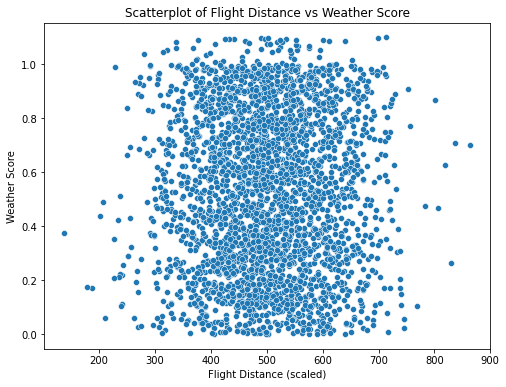

In [3]:
# Identify outliers - Assuming we're checking for outliers in the 'delay_minutes' column
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Flight_Distance', y='Weather_Score', data=flight_data)
plt.title("Scatterplot of Flight Distance vs Weather Score")
plt.xlabel("Flight Distance (scaled)")
plt.ylabel("Weather Score")
plt.show()


In [4]:
# Check data types
print("\nData types of each column:")
print(flight_data.dtypes)


Data types of each column:
Flight ID                          int64
Airline                           object
Flight_Distance                    int64
Origin_Airport                    object
Destination_Airport               object
Scheduled_Departure_Time           int64
Day_of_Week                        int64
Month                              int64
Airplane_Type                     object
Weather_Score                    float64
Previous_Flight_Delay_Minutes    float64
Airline_Rating                   float64
Passenger_Load                   float64
Flight_Cancelled                   int64
dtype: object


#### - The data type is appropriate for the data it represents.

# TASK 2 - EDA

Descriptive Statistics:
          Flight ID  Flight_Distance  Scheduled_Departure_Time  Day_of_Week  \
count  3.000000e+03      3000.000000               3000.000000  3000.000000   
mean   4.997429e+06       498.909333                 11.435000     3.963000   
std    2.868139e+06        98.892266                  6.899298     2.016346   
min    3.681000e+03       138.000000                  0.000000     1.000000   
25%    2.520313e+06       431.000000                  6.000000     2.000000   
50%    5.073096e+06       497.000000                 12.000000     4.000000   
75%    7.462026e+06       566.000000                 17.000000     6.000000   
max    9.999011e+06       864.000000                 23.000000     7.000000   

             Month  Weather_Score  Previous_Flight_Delay_Minutes  \
count  3000.000000    3000.000000                    3000.000000   
mean      6.381000       0.524023                      26.793383   
std       3.473979       0.290694                      27.87

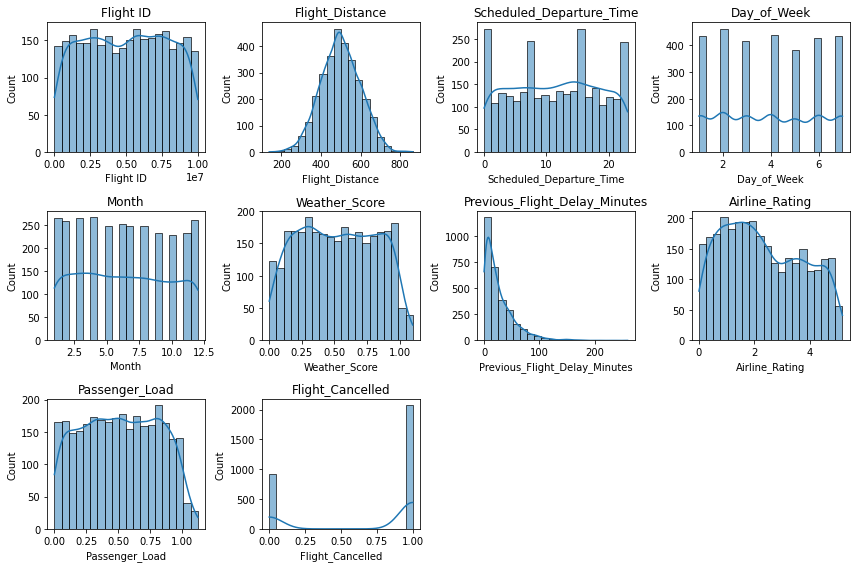

In [5]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(flight_data.describe())

# Distribution of data - Histograms for numeric columns
numeric_columns = flight_data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(flight_data[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

#### - Flights in the dataset cover a wide range of distances, scheduled times, days of the week, and months, suggesting a diverse dataset representative of various flight scenarios.
#### - There are various weather conditions, as indicated by the weather score, which may impact flight cancellations.

/tmp/ipykernel_124/2628748452.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = flight_data.corr()


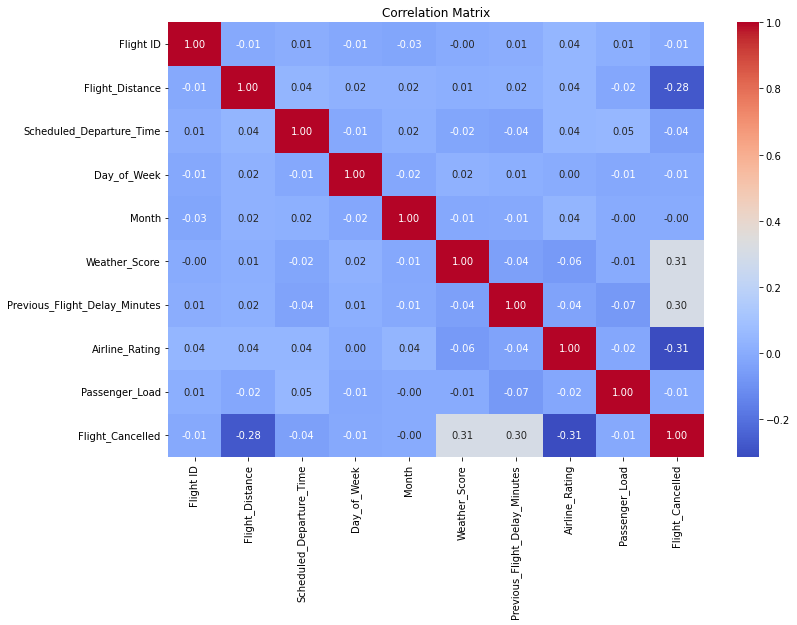

In [6]:
# Relationship between features - Correlation matrix
correlation_matrix = flight_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


/tmp/ipykernel_124/3786820491.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Flight_Cancelled', data=flight_data, ci=None)
/tmp/ipykernel_124/3786820491.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Flight_Cancelled', data=flight_data, ci=None)
/tmp/ipykernel_124/3786820491.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Flight_Cancelled', data=flight_data, ci=None)
/tmp/ipykernel_124/3786820491.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Flight_Cancelled', data=flight_data, ci=None)


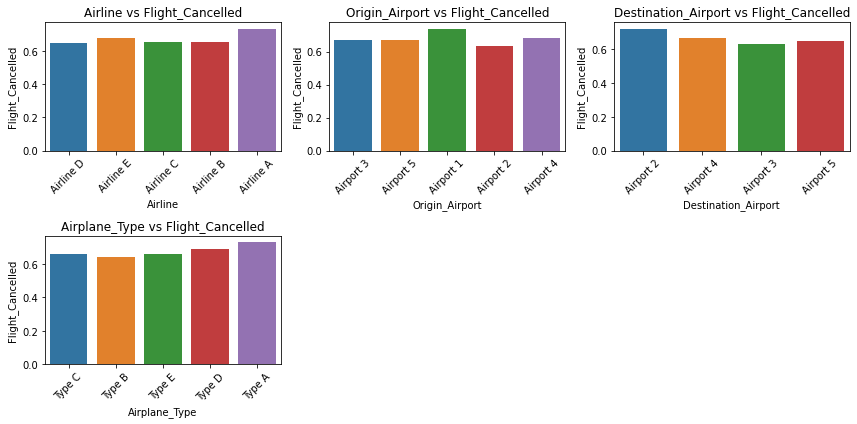

In [7]:
# Relationship between features and target variable - Barplot for categorical features and target variable
categorical_columns = flight_data.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=col, y='Flight_Cancelled', data=flight_data, ci=None)
    plt.title(f"{col} vs Flight_Cancelled")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### - The airline, airline type, destination airport, and  origin airport all influence flight cancellations, one way or another

# TASK 3 - PREPROCESSING AND MODEL BUILDING 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Splitting the dataset into features (X) and target variable (y)
X = flight_data.drop(columns=['Flight_Cancelled', 'Flight ID'])
y = flight_data['Flight_Cancelled']

# Splitting the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing categorical variables and scaling numerical variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Building the Logistic Regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Model Evaluation Metrics:
Accuracy: 0.80
Precision: 0.83
Recall: 0.89
F1 Score: 0.86
Confusion Matrix:
[[114  73]
 [ 47 366]]


#### - 80% of predictions made by the model were correct; 83% of cancelled flights were actually cancelled 
#### - Overall, the model demonstrates reasonably good performance, with high precision and recall results/, suggesting its effectiveness in predicting flight cancellations.
